In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#checking the device property...
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16102928591394074397
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 15158327390985708523
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 4456845501435900153
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14912199066
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10873056543686686667
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
from nltk.corpus import stopwords
import time
from tensorflow.python.layers.core import Dense
from tensorflow.python.ops.rnn_cell_impl import _zero_state_tensors
print('TensorFlow Version: {}'.format(tf.__version__))


tf.enable_eager_execution()

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import unicodedata



import time
import string


TensorFlow Version: 1.15.0


In [ ]:
import os


def data_load(path):
    """
    Load dataset
    """
    input_file = os.path.join(path)
    with open(input_file, "r",encoding="UTF-8" ) as f:
        data = f.read()

    return data.split('\n')

In [ ]:
Documents_files= []
Summaries_files= []

In [ ]:
def Documents_load(Doc):
  sent_pair1 = []
  for i in range(len(Doc)):
    
    bangla = Doc[i]
    print(Doc[i])
    sent_pair1.append(bangla)
    
    
   
    
    
  Documents_files.append(sent_pair1)


In [ ]:

def Summaries_load(Sum):
  print('\n')
  sent_pair2 = []
  for i in range(len(Sum)):
    
    bangla = Sum[i]
    print(Sum[i])
    sent_pair2.append(bangla)
  Summaries_files.append(sent_pair2)

In [ ]:
exclude = set(string.punctuation) # Set of all special characters
remove_digits = str.maketrans(' ', ' ', string.digits) # Set of all digits

In [ ]:
def preprocess_Documents(sent):
    '''Function to preprocess bangla sentence'''
    sent = re.sub("Text", ' ', sent) # remove the quotation marks if any
    sent = re.sub("Title", ' ', sent)
    
    sent = re.sub(" ‘বেকার’ ", ' ', sent)
    sent = re.sub(" \ufeffTitle: ", ' ', sent)
    sent = ''.join(ch for ch in sent if ch not in exclude)
    sent = re.sub("[১২৩৪৫৬৭৮৯১০]", "", sent) # remove the digits
    sent = sent.strip()
    sent = re.sub(" +", " ", sent) # remove extra spaces
    sent = 'start  ' + sent + 'end  ' # add <start> and <end> tokens
    return sent

In [ ]:
def preprocess_Summaries(sent):
    '''Function to preprocess bangla sentence'''
    sent = re.sub("Text", ' ', sent) # remove the quotation marks if any
    sent = re.sub("Title", ' ', sent)
    
    sent = re.sub(" ‘বেকার ’", ' ', sent)
    sent = re.sub(" \ufeffTitle: ", ' ', sent)
    sent = ''.join(ch for ch in sent if ch not in exclude)
    sent = re.sub("[১২৩৪৫৬৭৮৯১০]", "", sent) # remove the digits
    sent = sent.strip()
    sent = re.sub(" +", " ", sent) # remove extra spaces
    sent = 'start  ' + sent +  'end  ' # add <start> and <end> tokens
    return sent

In [ ]:
for i in range(1,101) :
  location_Documents = '/content/drive/My Drive/Thesis_NLP/Dataset1/Documents/Document_'+str(i) +'.txt'
  Documents = open(location_Documents ,encoding='UTF-8').read().strip().split("|")
  Documents_load(Documents)
print("Documents " ,i , " : ",Documents_files[0:1],"\n")
  

Title: লতিফ সিদ্দিকী ছয় মাসের জামিন 

Text: 
  ধর্মীয় অনুভূতিতে আঘাতের অভিযোগে করা আরও ১০ মামলায় হাইকোর্ট থেকে জামিন পেয়েছেন সাবেক মন্ত্রী আবদুল লতিফ সিদ্দিকী। বিচারপতি মো. নিজামুল হক ও বিচারপতি মো. ফরিদ আহমদ শিবলীর সমন্বয়ে ঘটিত হাইকোর্ট বেঞ্চ আজ মঙ্গলবার এ আদেশ দেন।
আদালতে লতিফ সিদ্দিকীর পক্ষে শুনানি করেন আইনজীবী জ্যোতির্ময় বড়ুয়া। রাষ্ট্রপক্ষে ছিলেন ডেপুটি অ্যাটর্নি জেনারেল শেখ এ কে এম মনিরুজ্জামান।
এর আগে গত ২৬ মে ধর্মীয় অনুভূতিতে আঘাতের অভিযোগে করা আরও সাত মামলায় সাবেক এই মন্ত্রীকে ছয় মাসের অন্তর্বর্তী জামিন দিয়েছেন হাইকোর্ট। একই সঙ্গে এসব মামলার কার্যক্রম ছয় মাসের জন্য স্থগিত করেছিলেন আদালত। গত বছর সেপ্টেম্বরে যুক্তরাষ্ট্রের নিউইয়র্কে এক অনুষ্ঠানে হজ ও তাবলিগ জামাত নিয়ে বিরূপ মন্তব্য করে সমালোচনার মুখে পড়েন আবদুল লতিফ সিদ্দিকী। এ ঘটনার পর আওয়ামী লীগের সভাপতিমণ্ডলীর এই সদস্য দল থেকে বহিষ্কৃত হন। একই ঘটনায় ধর্মীয় অনুভূতিতে আঘাত ও কটূক্তির অভিযোগে তাঁর বিরুদ্ধে রাজধানী ঢাকাসহ দেশের বিভিন্ন জেলায় বেশ কয়েকটি মামলা হয়। নির্ধারিত সময়ে আদালতে হাজির না হওয়ায় প্রতিটি মামলায় তাঁর বিরুদ্ধে গ্র

In [ ]:
for i in range(1,101):
  for j in range(1,4):
    location_Summaries = '/content/drive/My Drive/Thesis_NLP/Dataset1/Summaries/Document_'+str(i) +'_Summary_'+str(j)+'.txt'
    Summaries = open(location_Summaries ,encoding='UTF-8').read().strip().split("\n")
    Summaries_load(Summaries)
print("Summaries " ,i , " : ",Summaries_files[0:2],"\n")




ধর্মীয় অনুভূতিতে আঘাতের অভিযোগে করা আরও ১০ মামলায় হাইকোর্ট থেকে জামিন পেয়েছেন সাবেক মন্ত্রী আবদুল লতিফ সিদ্দিকী
গত বছর সেপ্টেম্বরে যুক্তরাষ্ট্রের নিউইয়র্কে এক অনুষ্ঠানে হজ ও তাবলিগ জামাত নিয়ে বিরূপ মন্তব্য করে সমালোচনার মুখে পড়েন আবদুল লতিফ সিদ্দিকী
নির্ধারিত সময়ে আদালতে হাজির না হওয়ায় প্রতিটি মামলায় তাঁর বিরুদ্ধে গ্রেপ্তারি পরোয়ানা জারি করেন আদালত
এই দশ মামলায় লতিফকে অন্তবর্তীকালীন জামিন দেওয়ার পাশাপাশি মামলাগুলোর কার্যক্রম ছয় মাসের জন্য স্থগিত করেছে আদালত
এসব মামলা কেন বাতিল করা হবে না তা জানতে চেয়ে একটি রুলও জারি করা হয়েছে, মামলার বাদী ও সরকারকে চার সপ্তাহের মধ্যে যার জবাব দিতে হবে
আদেশের পর ডেপুটি অ্যাটর্নি জেনারেল মনিরুজ্জামান কবির বলেন, \"এ নিয়ে মোট ১৭টি মামলায় লতিফ সিদ্দিকী জামিন পেলেন। তবে আরও পাঁচটি মামলা থাকায় তিনি আপাতত মুক্তি পাচ্ছেন না।\"


ধর্মীয় অনুভূতিতে আঘাতের অভিযোগে করা আরও ১০ মামলায় হাইকোর্ট থেকে জামিন পেয়েছেন সাবেক মন্ত্রী আবদুল লতিফ সিদ্দিকী
বিচারপতি মো. নিজামুল হক ও বিচারপতি মো. ফরিদ আহমদ শিবলীর সমন্বয়ে ঘটিত হাইকোর্ট বেঞ্চ আজ মঙ্গলবার এ আদেশ দেন
এর আগে গত ২৬ মে

## **preprocess**

***Documents***

In [ ]:
# Generate pairs of cleaned English and Bangla sentences
Doc_pairs = []
for line in Documents_files:
    sent_pair = []
    
    Docs = preprocess_Documents((line[0]))
    sent_pair.append(Docs)
    
    
  
    Doc_pairs.append(sent_pair)
    

print(Doc_pairs[0:3])


[['start  লতিফ সিদ্দিকী ছয় মাসের জামিন \n\n \n ধর্মীয় অনুভূতিতে আঘাতের অভিযোগে করা আরও মামলায় হাইকোর্ট থেকে জামিন পেয়েছেন সাবেক মন্ত্রী আবদুল লতিফ সিদ্দিকী। বিচারপতি মো নিজামুল হক ও বিচারপতি মো ফরিদ আহমদ শিবলীর সমন্বয়ে ঘটিত হাইকোর্ট বেঞ্চ আজ মঙ্গলবার এ আদেশ দেন।\nআদালতে লতিফ সিদ্দিকীর পক্ষে শুনানি করেন আইনজীবী জ্যোতির্ময় বড়ুয়া। রাষ্ট্রপক্ষে ছিলেন ডেপুটি অ্যাটর্নি জেনারেল শেখ এ কে এম মনিরুজ্জামান।\nএর আগে গত মে ধর্মীয় অনুভূতিতে আঘাতের অভিযোগে করা আরও সাত মামলায় সাবেক এই মন্ত্রীকে ছয় মাসের অন্তর্বর্তী জামিন দিয়েছেন হাইকোর্ট। একই সঙ্গে এসব মামলার কার্যক্রম ছয় মাসের জন্য স্থগিত করেছিলেন আদালত। গত বছর সেপ্টেম্বরে যুক্তরাষ্ট্রের নিউইয়র্কে এক অনুষ্ঠানে হজ ও তাবলিগ জামাত নিয়ে বিরূপ মন্তব্য করে সমালোচনার মুখে পড়েন আবদুল লতিফ সিদ্দিকী। এ ঘটনার পর আওয়ামী লীগের সভাপতিমণ্ডলীর এই সদস্য দল থেকে বহিষ্কৃত হন। একই ঘটনায় ধর্মীয় অনুভূতিতে আঘাত ও কটূক্তির অভিযোগে তাঁর বিরুদ্ধে রাজধানী ঢাকাসহ দেশের বিভিন্ন জেলায় বেশ কয়েকটি মামলা হয়। নির্ধারিত সময়ে আদালতে হাজির না হওয়ায় প্রতিটি মামলায় তাঁর বিরুদ্ধে গ্রেপ্তার

In [ ]:
q= Documents_files[0]
print(type(q))
print(type(q[0]))

<class 'list'>
<class 'str'>


In [ ]:
print(Doc_pairs[1:2])

[['start  বুয়েট বন্ধ হল ত্যাগের নির্দেশ \n\n \n বাংলাদেশ প্রকৌশল বিশ্ববিদ্যালয় বুয়েট আজ বৃহস্পতিবার থেকে অনির্দিষ্টকালের জন্য বন্ধ ঘোষণা করা হয়েছে। আজ বিকেল পাঁচটার মধ্যে আবাসিক হলে অবস্থানরত সব ছাত্রছাত্রীকে হল ছাড়ার নির্দেশ দেওয়া হয়েছে।\nআজ আড়াইটার দিকে এ আদেশ সংবলিত বিজ্ঞপ্তি বিভিন্ন হলের নোটিশ বোর্ডে সেঁটে দেওয়া হয়।\nবুয়েটের রেজিস্ট্রার অধ্যাপক এ কে এম মাসুদ স্বাক্ষরিত ওই বিজ্ঞপ্তির ভাষ্য চলতি টার্মের পূর্ব ঘোষিত টার্ম ফাইনাল পরীক্ষা পেছানোর দাবিতে জুন একদল ছাত্রছাত্রীর উপাচার্য রেজিস্ট্রার ও ছাত্রকল্যাণ পরিচালককে উপাচার্য কার্যালয়ে জিম্মি করা জুন শিক্ষকদের আবাসিক এলাকা অবরুদ্ধ করা এবং রাতে একাডেমিক ভবন ভাঙচুর ও অগ্নিসংযোগ করার পরিপ্রেক্ষিতে বিশ্ববিদ্যালয়ের সার্বিক আইনশৃঙ্খলা পরিস্থিতির চরম অবনতি ঘটছে এবং শিক্ষার পরিবেশ ভীষণভাবে বিঘ্নিত হচ্ছে। এ অবস্থায় বিশ্ববিদ্যালয়ের সার্বিক শৃঙ্খলা বজায় রাখা ছাত্রছাত্রী শিক্ষক ও কর্মকর্তাকর্মচারীদের জানমালের নিরাপত্তা বিধানের স্বার্থে এবং শিক্ষার সুষ্ঠু পরিবেশ ফিরিয়ে আনার লক্ষ্যে এ বিশ্ববিদ্যালয়ের সব শিক্ষা কার্যক্রম আজ বিকেল থেকে অনির্দিষ্টকালে

***Summary***

In [ ]:
# Generate pairs of cleaned English and Bangla sentences
Sum_pairs = []
for line in Summaries_files:
    sent_pair1 = []
    
    Sums = preprocess_Documents(str(line[0]))
    sent_pair1.append(Sums)
    
    
  
    Sum_pairs.append(sent_pair1)
    

print(Sum_pairs[0:1])


[['start  ধর্মীয় অনুভূতিতে আঘাতের অভিযোগে করা আরও মামলায় হাইকোর্ট থেকে জামিন পেয়েছেন সাবেক মন্ত্রী আবদুল লতিফ সিদ্দিকীend  ']]


In [ ]:
print(Sum_pairs[3:4])

[['start  বুয়েটের রেজিস্ট্রার অধ্যাপক এ কে এম মাসুদ স্বাক্ষরিত ওই বিজ্ঞপ্তির ভাষ্য চলতি টার্মের পূর্ব ঘোষিত টার্ম ফাইনাল পরীক্ষা পেছানোর দাবিতে জুন একদল ছাত্রছাত্রীর উপাচার্য রেজিস্ট্রার ও ছাত্রকল্যাণ পরিচালককে উপাচার্য কার্যালয়ে জিম্মি করা জুন শিক্ষকদের আবাসিক এলাকা অবরুদ্ধ করা এবং রাতে একাডেমিক ভবন ভাঙচুর ও অগ্নিসংযোগ করার পরিপ্রেক্ষিতে বিশ্ববিদ্যালয়ের সার্বিক আইনশৃঙ্খলা পরিস্থিতির চরম অবনতি ঘটছে এবং শিক্ষার পরিবেশ ভীষণভাবে বিঘ্নিত হচ্ছেend  ']]


## **Sent pair merge**

In [ ]:
final_dataset= []

In [ ]:
def doc_sum_merge(Doc_pairs , Sum_pairs ):
  for i in range(len(Doc_pairs)):
     
    for j in range((3*i), (3*i+3)):
      sent_pair = []
      Documents_pair = Doc_pairs[i]
      Summaries_pair = Sum_pairs[j]
    
      sent_pair.append(Documents_pair)
      
      sent_pair.append(Summaries_pair)
    
      final_dataset.append(sent_pair)


In [ ]:
doc_sum_merge(Doc_pairs, Sum_pairs)

In [ ]:
print(final_dataset[3:4])

[[['start  বুয়েট বন্ধ হল ত্যাগের নির্দেশ \n\n \n বাংলাদেশ প্রকৌশল বিশ্ববিদ্যালয় বুয়েট আজ বৃহস্পতিবার থেকে অনির্দিষ্টকালের জন্য বন্ধ ঘোষণা করা হয়েছে। আজ বিকেল পাঁচটার মধ্যে আবাসিক হলে অবস্থানরত সব ছাত্রছাত্রীকে হল ছাড়ার নির্দেশ দেওয়া হয়েছে।\nআজ আড়াইটার দিকে এ আদেশ সংবলিত বিজ্ঞপ্তি বিভিন্ন হলের নোটিশ বোর্ডে সেঁটে দেওয়া হয়।\nবুয়েটের রেজিস্ট্রার অধ্যাপক এ কে এম মাসুদ স্বাক্ষরিত ওই বিজ্ঞপ্তির ভাষ্য চলতি টার্মের পূর্ব ঘোষিত টার্ম ফাইনাল পরীক্ষা পেছানোর দাবিতে জুন একদল ছাত্রছাত্রীর উপাচার্য রেজিস্ট্রার ও ছাত্রকল্যাণ পরিচালককে উপাচার্য কার্যালয়ে জিম্মি করা জুন শিক্ষকদের আবাসিক এলাকা অবরুদ্ধ করা এবং রাতে একাডেমিক ভবন ভাঙচুর ও অগ্নিসংযোগ করার পরিপ্রেক্ষিতে বিশ্ববিদ্যালয়ের সার্বিক আইনশৃঙ্খলা পরিস্থিতির চরম অবনতি ঘটছে এবং শিক্ষার পরিবেশ ভীষণভাবে বিঘ্নিত হচ্ছে। এ অবস্থায় বিশ্ববিদ্যালয়ের সার্বিক শৃঙ্খলা বজায় রাখা ছাত্রছাত্রী শিক্ষক ও কর্মকর্তাকর্মচারীদের জানমালের নিরাপত্তা বিধানের স্বার্থে এবং শিক্ষার সুষ্ঠু পরিবেশ ফিরিয়ে আনার লক্ষ্যে এ বিশ্ববিদ্যালয়ের সব শিক্ষা কার্যক্রম আজ বিকেল থেকে অনির্দিষ্টকাল

**This is the final dataset.**

**Type list **

**Size = (3 times of Documents_pairs )**

## **Modifying Dataset**

In [ ]:
# This class creates a word -> index mapping (e.g,. "dad" -> 5) and vice-versa 
# (e.g., 5 -> "dad") for each language,
class LanguageIndex():
    def __init__(self, lang):
        self.lang = lang
        self.word2idx = {}
        self.idx2word = {}
        self.vocab = set()

        self.create_index()

    def create_index(self):
        for phrase in self.lang:
            self.vocab.update(phrase.split(' '))

        self.vocab = sorted(self.vocab)

        self.word2idx['<pad>'] = 0
        for index, word in enumerate(self.vocab):
            self.word2idx[word] = index + 1

        for word, index in self.word2idx.items():
            self.idx2word[index] = word
        #print("unique words : " , len(self.idx2word))

In [ ]:
def max_length(tensor):
    return max(len(t) for t in tensor)

In [ ]:
print(type(final_dataset))

<class 'list'>


In [ ]:
def load_dataset(pairs, num_examples):
    # pairs => already created cleaned input, output pairs

    # index language using the class defined above    
    inp_lang = LanguageIndex(en[0] for en, ma in pairs)
    targ_lang = LanguageIndex(ma[0] for en, ma in pairs)
    
    # Vectorize the input and target languages
    
    # bangla sentences
    input_tensor = [[inp_lang.word2idx[s] for s in en[0].split(' ')] for en, ma in pairs]
    #print("dsflsjkdf",type(input_tensor))
    #print(input_tensor)
    # English sentences
    target_tensor = [[targ_lang.word2idx[s] for s in ma[0].split(' ')] for en, ma in pairs]
    
    # Calculate max_length of input and output tensor
    # Here, we'll set those to the longest sentence in the dataset
    max_length_inp, max_length_tar = max_length(input_tensor), max_length(target_tensor)
    
    # Padding the input and output tensor to the maximum length
    input_tensor = tf.keras.preprocessing.sequence.pad_sequences(input_tensor, 
                                                                 maxlen=max_length_inp,
                                                                 padding='post')
    
    target_tensor = tf.keras.preprocessing.sequence.pad_sequences(target_tensor, 
                                                                  maxlen=max_length_tar, 
                                                                  padding='post')
   # print("111111111",type(input_tensor))
    return input_tensor, target_tensor, inp_lang, targ_lang, max_length_inp, max_length_tar

In [ ]:
'''for en, ma in final_dataset:
  print(en[0])
  print(type(en[0]))
  '''

'for en, ma in final_dataset:\n  print(en[0])\n  print(type(en[0]))\n  '

In [ ]:
 '''for en, ma in final_dataset:
   for s in en[0].split(' '):
      print(s)
      print(type(s))
    '''

"for en, ma in final_dataset:\n  for s in en[0].split(' '):\n     print(s)\n     print(type(s))\n   "

In [ ]:
'''n= 0
for en, ma in final_dataset:
  print(type(en[0]))
  print(en[0].split(' '))
  print(en)
  n+=1
  if n>2:
    break
'''

"n= 0\nfor en, ma in final_dataset:\n  print(type(en[0]))\n  print(en[0].split(' '))\n  print(en)\n  n+=1\n  if n>2:\n    break\n"

In [ ]:
input_tensor, target_tensor, inp_lang, targ_lang, max_length_inp, max_length_targ = load_dataset(final_dataset,len(final_dataset))

## **Dataset Split**

In [ ]:
# Creating training and validation sets using an 80-20 split
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.1, random_state = 101)

# Show length
print("length of input_tensor_train" ,  len(input_tensor_train))
print("length of target_tensor_train" ,len(target_tensor_train))
print("length of input_tensor_val" ,len(input_tensor_val))
print("length of target_tensor_val" ,len(target_tensor_val))

length of input_tensor_train 270
length of target_tensor_train 270
length of input_tensor_val 30
length of target_tensor_val 30


In [ ]:
print("input tensor length : ",len(input_tensor))
print("target_tensor length : ",len(target_tensor))
print("max_length_inp length : ",(max_length_inp))
print("max_length_targ length: ",(max_length_targ))

input tensor length :  300
target_tensor length :  300
max_length_inp length :  471
max_length_targ length:  65


# **Model Architecture**

In [ ]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE =16
N_BATCH = BUFFER_SIZE//BATCH_SIZE
embedding_dim = 128
units = 512
vocab_inp_size = len(inp_lang.word2idx)
vocab_tar_size = len(targ_lang.word2idx)

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
def gru(units):
  # If you have a GPU, we recommend using CuDNNGRU(provides a 3x speedup than GRU)
  # the code automatically does that.
    if tf.test.is_gpu_available():
        return tf.keras.layers.CuDNNGRU(units, 
                                        return_sequences=True, 
                                        return_state=True, 
                                        recurrent_initializer='glorot_uniform')
    else:
        return tf.keras.layers.GRU(units, 
                                   return_sequences=True, 
                                   return_state=True, 
                                   recurrent_activation='sigmoid', 
                                   recurrent_initializer='glorot_uniform')

In [ ]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = gru(self.enc_units)
        
    def call(self, x, hidden):
        x = self.embedding(x)
        output, state = self.gru(x, initial_state = hidden)        
        return output, state
    
    def initialize_hidden_state(self):
        return tf.zeros((self.batch_sz, self.enc_units))

In [ ]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = gru(self.dec_units)
        self.fc = tf.keras.layers.Dense(vocab_size)
        
        # used for attention
        self.W1 = tf.keras.layers.Dense(self.dec_units)
        self.W2 = tf.keras.layers.Dense(self.dec_units)
        self.V = tf.keras.layers.Dense(1)
        
    def call(self, x, hidden, enc_output):
        # enc_output shape == (batch_size, max_length, hidden_size)
        
        # hidden shape == (batch_size, hidden size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden size)
        # we are doing this to perform addition to calculate the score
        hidden_with_time_axis = tf.expand_dims(hidden, 1)
        
        # score shape == (batch_size, max_length, 1)
        # we get 1 at the last axis because we are applying tanh(FC(EO) + FC(H)) to self.V
        score = self.V(tf.nn.tanh(self.W1(enc_output) + self.W2(hidden_with_time_axis)))
        
        # attention_weights shape == (batch_size, max_length, 1)
        attention_weights = tf.nn.softmax(score, axis=1)
        
        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * enc_output
        context_vector = tf.reduce_sum(context_vector, axis=1)
        
        # x shape after passing through embedding == (batch_size, 1, embedding_dim)
        x = self.embedding(x)
        
        # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
        
        # passing the concatenated vector to the GRU
        output, state = self.gru(x)
        
        # output shape == (batch_size * 1, hidden_size)
        output = tf.reshape(output, (-1, output.shape[2]))
        
        # output shape == (batch_size * 1, vocab)
        x = self.fc(output)
        
        return x, state, attention_weights
        
    def initialize_hidden_state(self):
        return tf.zeros((self.batch_sz, self.dec_units))

In [ ]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

In [ ]:
optimizer = tf.train.AdamOptimizer()


def loss_function(real, pred):
    mask = 1 - np.equal(real, 0)
    loss_ = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=real, logits=pred) * mask
    return tf.reduce_mean(loss_)


In [ ]:
checkpoint_dir = '/content/Trained_model/'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

In [ ]:
EPOCHS = 120
total_time = time.time()
for epoch in range(EPOCHS):

    start = time.time()
    
    hidden = encoder.initialize_hidden_state()
    total_loss = 0
    
    for (batch, (inp, targ)) in enumerate(dataset):
        loss = 0
        
        with tf.GradientTape() as tape:
            enc_output, enc_hidden = encoder(inp, hidden)
            
            dec_hidden = enc_hidden
            
            dec_input = tf.expand_dims([targ_lang.word2idx['start']] * BATCH_SIZE, 1)       
            
            # Teacher forcing - feeding the target as the next input
            for t in range(1, targ.shape[1]):
                # passing enc_output to the decoder
                predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)
                
                loss += loss_function(targ[:, t], predictions)
                
                # using teacher forcing
                dec_input = tf.expand_dims(targ[:, t], 1)
        
        batch_loss = (loss / int(targ.shape[1]))
        
        total_loss += batch_loss
        
        variables = encoder.variables + decoder.variables
        
        gradients = tape.gradient(loss, variables)
        
        optimizer.apply_gradients(zip(gradients, variables))
        
        if batch % 100 == 0:
            print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                         batch,
                                                         batch_loss.numpy()))
    # saving (checkpoint) the model every epoch
    #checkpoint.save(file_prefix = checkpoint_prefix)
    
    print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                        total_loss / N_BATCH))
    print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

checkpoint.save(file_prefix = checkpoint_prefix)
print("total time :" , (time.time() - total_time))

Epoch 1 Batch 0 Loss 2.3041
Epoch 1 Loss 2.1725
Time taken for 1 epoch 38.323177337646484 sec

Epoch 2 Batch 0 Loss 2.0755
Epoch 2 Loss 1.9914
Time taken for 1 epoch 18.138563871383667 sec

Epoch 3 Batch 0 Loss 2.0143
Epoch 3 Loss 1.9590
Time taken for 1 epoch 18.10196042060852 sec

Epoch 4 Batch 0 Loss 1.9727
Epoch 4 Loss 1.9258
Time taken for 1 epoch 18.291457653045654 sec

Epoch 5 Batch 0 Loss 1.9302
Epoch 5 Loss 1.8856
Time taken for 1 epoch 18.103827476501465 sec

Epoch 6 Batch 0 Loss 1.8841
Epoch 6 Loss 1.8414
Time taken for 1 epoch 18.569677591323853 sec

Epoch 7 Batch 0 Loss 1.8276
Epoch 7 Loss 1.7937
Time taken for 1 epoch 18.277307748794556 sec

Epoch 8 Batch 0 Loss 1.7729
Epoch 8 Loss 1.7470
Time taken for 1 epoch 17.93175768852234 sec

Epoch 9 Batch 0 Loss 1.7427
Epoch 9 Loss 1.7101
Time taken for 1 epoch 18.19317865371704 sec

Epoch 10 Batch 0 Loss 1.7011
Epoch 10 Loss 1.6863
Time taken for 1 epoch 18.22120189666748 sec

Epoch 11 Batch 0 Loss 1.6810
Epoch 11 Loss 1.6538
Ti

## **Evaluation**

In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [ ]:
def evaluate(inputs, encoder, decoder, inp_lang, targ_lang, max_length_inp, max_length_targ):
    
    attention_plot = np.zeros((max_length_targ, max_length_inp))
    sentence = ''
    
    for i in inputs[0]:
        if i == 0:
            break
        sentence = sentence + inp_lang.idx2word[i] + ' '
        #print(inp_lang.idx2word[i])
      
    sentence = sentence[:-1]
    #print(print("1cc ",inputs.shape))
    #print('xxxx ',type(inputs))
    inputs = tf.convert_to_tensor(inputs)
    #print("cc ",inputs.shape)
    result = ''

    hidden = [tf.zeros((1, units))]
    enc_out, enc_hidden = encoder(inputs, hidden)

    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([targ_lang.word2idx['start']], 0)
   # print(targ_lang.word2idx['<start>'])
    for t in range(max_length_targ):
        predictions, dec_hidden, attention_weights = decoder(dec_input, dec_hidden, enc_out)
        
        # storing the attention weights to plot later on
        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention_plot[t] = attention_weights.numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()

        result += targ_lang.idx2word[predicted_id] + ' '

        if targ_lang.idx2word[predicted_id] == 'end':
            return result, sentence, attention_plot
        
        # the predicted ID is fed back into the model
        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention_plot

In [ ]:
#check for validation...
def predict_random_val_sentence(k):    
    actual_sent = ''
    #k = np.random.randint(len(input_tensor_val))
    #k=2
    random_input = input_tensor_val[k]
    #print('dddddddddddd',type(random_input))
    random_output = target_tensor_val[k]
    random_input = np.expand_dims(random_input,0)
    #print('dddddddddddd',type(random_input))
    #print('dddd111111d',random_input.shape)
    result, sentence, attention_plot = evaluate(random_input, encoder, decoder, inp_lang, targ_lang, max_length_inp, max_length_targ)
    print('Input: {}'.format(sentence[8:-6]))
    print('Predicted Summarization: {}'.format(result[:-1]))
    for i in random_output:
        if i == 0:
            break
        actual_sent = actual_sent + targ_lang.idx2word[i] + ' '
    actual_sent = actual_sent[8:-7]
    print('Actual Summarization: {}'.format(actual_sent))
    attention_plot = attention_plot[:len(result.split(' '))-2, 1:len(sentence.split(' '))-1]
    sentence, result = sentence.split(' '), result.split(' ')
    sentence = sentence[1:-1]
    result = result[:-2]
    print(result)

In [ ]:
for i in range(2):
  k = np.random.randint(len(input_tensor_val))
  predict_random_val_sentence(k)

Input: ছরের সর্বনিম্ন অবস্থানে ডিএসইর প্রধান সূচক 

 
 সপ্তাহের দ্বিতীয় কার্যদিবসে গতকাল সোমবার দেশের প্রধান শেয়ারবাজার ঢাকা স্টক এক্সচেঞ্জের ডিএসই প্রধান সূচক ডিএসইএক্স প্রায় পয়েন্ট কমে হাজার পয়েন্টে নেমে এসেছে। এটি চলতি বছরে এই সূচকের সর্বনিম্ন অবস্থান।
এর আগে গত বছরের ডিসেম্বর ডিএসইর প্রধান সূচকটি একই অবস্থানে ছিল। ওই দিন এ সূচক হাজার পয়েন্টে নেমে গিয়েছিল।
অবশ্য গতকাল ডিএসইতে সূচক কমলেও লেনদেন বেড়ে প্রায় কোটি টাকায় উঠেছে যা আগের দিনের কোটি লাখ টাকার চেয়ে কোটি লাখ টাকা বেশি।
মার্চেন্ট ব্যাংক আইডিএলসি ইনভেস্টমেন্টসের বাজার পর্যালোচনা প্রতিবেদনে বলা হয়েছে গত সপ্তাহ থেকে বাজার নিয়ে বিনিয়োগকারীদের মনে যে বিষাদ তৈরি হয়েছে তা এখনো কাটেনি। তাই বাজারের ওপর দীর্ঘ মেয়াদে আস্থা রাখতে পারছেন না তাঁরা। সে জন্য স্বল্পকালীন মুনাফার পেছনে ছুটছেন বিনিয়োগকারীরা।
লঙ্কাবাংলা ফিন্যান্সিয়াল পোর্টালের তথ্য অনুযায়ী দরবৃদ্ধির দিক থেকে গতকালের বাজারে সবচেয়ে সক্রিয় কোম্পানি ছিল ওয়াটা কেমিক্যালস। এদিন কোম্পানিটির প্রতিটি শেয়ারের দাম এক লাফে শতাংশ বা টাকা পয়সা বেড়ে দাঁড়িয়েছে টাকা পয়সায়
Predicted Sum

## **Checking Phase**

In [ ]:
Documents_test_files= []
Summaries_test_files= []

In [ ]:
def Documents_load_test(Doc):
  sent_pair1 = []
  for i in range(len(Doc)):
    
    bangla = Doc[i]
    print(Doc[i])
    sent_pair1.append(bangla)
    
    
   
    
    
  Documents_test_files.append(sent_pair1)

In [ ]:
def Summaries_load_test(Sum):
  print('\n')
  sent_pair2 = []
  for i in range(len(Sum)):
    
    bangla = Sum[i]
    print(Sum[i])
    sent_pair2.append(bangla)
  Summaries_test_files.append(sent_pair2)

In [ ]:
final_test_dataset= []

In [ ]:
def doc_sum_merge_test(Doc_pairs , Sum_pairs ):
  for i in range(len(Doc_pairs)):
     
    for j in range((3*i), (3*i+3)):
      sent_pair = []
      Documents_pair = Doc_pairs[i]
      Summaries_pair = Sum_pairs[j]
    
      sent_pair.append(Documents_pair)
      
      sent_pair.append(Summaries_pair)
    
      final_test_dataset.append(sent_pair)

In [ ]:
for i in range(91,101) :
  location_Documents = '/content/drive/My Drive/Thesis_NLP/Dataset1/Documents/Document_'+str(i) +'.txt'
  Documents = open(location_Documents ,encoding='UTF-8-sig').read().strip().split("|")
  Documents_load_test(Documents)
print("Documents " ,i , " : ",Documents_test_files[0:1],"\n")

Title:  
শিক্ষা এবং প্রতিবন্ধী মাহাফুজারের প্রতিবাদ 

Text: 
  টেলিফোনে যখন মাহাফুজার রহমানের সঙ্গে কথা বলি, তখন তাঁকে আত্মপ্রত্যয়ী মনে হলো। তিনি একজন প্রতিবন্ধী। শৈশব থেকে তাঁর একটি হাত অকেজো। তিনি এক হাতেই দৈনন্দিন কাজকর্ম ও পড়াশোনা করে এসেছেন। এসএসসি ও এইচএসসিতে প্রথম বিভাগ পেয়েছেন। স্নাতক ও স্নাতকোত্তরে দ্বিতীয় বিভাগ। এরপর চাকরির পরীক্ষায় পাস করেও চূড়ান্ত নিয়োগ না হওয়ায় নিজের সব কটি মূল সনদ প্রধানমন্ত্রীর কাছে ফিরিয়ে দিতে গত ২৪ ফেব্রুয়ারি লালমনিরহাট জেলা প্রশাসকের কাছে জমা দিয়েছেন। প্রশাসনিকভাবে রীতিসম্মত না হলেও মানবিক কারণে তাঁর আবেদনপত্রের সঙ্গে ওই সনদগুলো জমা নেওয়া হয় বলে প্রথম আলোর খবরে বলা হয়। 
প্রধানমন্ত্রী বরাবর আবেদনপত্রে মাহাফুজার রহমান উল্লেখ করেন, লালমনিরহাট সদর উপজেলার রতিপুর গ্রামের বাসিন্দা তিনি। তিনি একজন শারীরিক প্রতিবন্ধী। ২০১২ সালে সরকারি প্রাথমিক বিদ্যালয়ের প্রধান শিক্ষক নিয়োগের লিখিত পরীক্ষায় উত্তীর্ণ হন। জেলার পাঁচটি উপজেলায় লিখিত পরীক্ষায় উত্তীর্ণ ৪৫ জনের মধ্যে মাহাফুজার রহমান একমাত্র শারীরিক প্রতিবন্ধী হিসেবে মৌখিক পরীক্ষা দেন।
Title: 
স্বপ্ন দেখাতে পার

In [ ]:
for i in range(91,101):
  for j in range(1,4):
    location_Summaries = '/content/drive/My Drive/Thesis_NLP/Dataset1/Summaries/Document_'+str(i) +'_Summary_'+str(j)+'.txt'
    Summaries = open(location_Summaries ,encoding='UTF-8-sig').read().strip().split("\n")
    Summaries_load_test(Summaries)
print("Summaries " ,i , " : ",Summaries_test_files[0:1],"\n")



টেলিফোনে যখন মাহাফুজার রহমানের সঙ্গে কথা বলি, তখন তাঁকে আত্মপ্রত্যয়ী মনে হলো
স্নাতক ও স্নাতকোত্তরে দ্বিতীয় বিভাগ
এরপর চাকরির পরীক্ষায় পাস করেও চূড়ান্ত নিয়োগ না হওয়ায় নিজের সব কটি মূল সনদ প্রধানমন্ত্রীর কাছে ফিরিয়ে দিতে গত ২৪ ফেব্রুয়ারি লালমনিরহাট জেলা প্রশাসকের কাছে জমা দিয়েছেন
জেলার পাঁচটি উপজেলায় লিখিত পরীক্ষায় উত্তীর্ণ ৪৫ জনের মধ্যে মাহাফুজার রহমান একমাত্র শারীরিক প্রতিবন্ধী হিসেবে মৌখিক পরীক্ষা দেন


তিনি এক হাতেই দৈনন্দিন কাজকর্ম ও পড়াশোনা করে এসেছেন
এরপর চাকরির পরীক্ষায় পাস করেও চূড়ান্ত নিয়োগ না হওয়ায় নিজের সব কটি মূল সনদ প্রধানমন্ত্রীর কাছে ফিরিয়ে দিতে গত ২৪ ফেব্রুয়ারি লালমনিরহাট জেলা প্রশাসকের কাছে জমা দিয়েছেন
প্রশাসনিকভাবে রীতিসম্মত না হলেও মানবিক কারণে তাঁর আবেদনপত্রের সঙ্গে ওই সনদগুলো জমা নেওয়া হয় বলে প্রথম আলোর খবরে বলা হয়
জেলার পাঁচটি উপজেলায় লিখিত পরীক্ষায় উত্তীর্ণ ৪৫ জনের মধ্যে মাহাফুজার রহমান একমাত্র শারীরিক প্রতিবন্ধী হিসেবে মৌখিক পরীক্ষা দেন


টেলিফোনে যখন মাহাফুজার রহমানের সঙ্গে কথা বলি, তখন তাঁকে আত্মপ্রত্যয়ী মনে হলো
তিনি এক হাতেই দৈনন্দিন কাজকর্ম ও পড়াশোনা 

In [ ]:
# Generate pairs of cleaned Document and Summary sentences
Doc_pairs_test = []
for line in Documents_test_files:
    sent_pair = []
    
    Docs = preprocess_Documents((line[0]))
    sent_pair.append(Docs)
    
    
  
    Doc_pairs_test.append(sent_pair)
    

print(Doc_pairs_test[0:1])


[['start  শিক্ষা এবং প্রতিবন্ধী মাহাফুজারের প্রতিবাদ \n\n \n টেলিফোনে যখন মাহাফুজার রহমানের সঙ্গে কথা বলি তখন তাঁকে আত্মপ্রত্যয়ী মনে হলো। তিনি একজন প্রতিবন্ধী। শৈশব থেকে তাঁর একটি হাত অকেজো। তিনি এক হাতেই দৈনন্দিন কাজকর্ম ও পড়াশোনা করে এসেছেন। এসএসসি ও এইচএসসিতে প্রথম বিভাগ পেয়েছেন। স্নাতক ও স্নাতকোত্তরে দ্বিতীয় বিভাগ। এরপর চাকরির পরীক্ষায় পাস করেও চূড়ান্ত নিয়োগ না হওয়ায় নিজের সব কটি মূল সনদ প্রধানমন্ত্রীর কাছে ফিরিয়ে দিতে গত ফেব্রুয়ারি লালমনিরহাট জেলা প্রশাসকের কাছে জমা দিয়েছেন। প্রশাসনিকভাবে রীতিসম্মত না হলেও মানবিক কারণে তাঁর আবেদনপত্রের সঙ্গে ওই সনদগুলো জমা নেওয়া হয় বলে প্রথম আলোর খবরে বলা হয়। \nপ্রধানমন্ত্রী বরাবর আবেদনপত্রে মাহাফুজার রহমান উল্লেখ করেন লালমনিরহাট সদর উপজেলার রতিপুর গ্রামের বাসিন্দা তিনি। তিনি একজন শারীরিক প্রতিবন্ধী। সালে সরকারি প্রাথমিক বিদ্যালয়ের প্রধান শিক্ষক নিয়োগের লিখিত পরীক্ষায় উত্তীর্ণ হন। জেলার পাঁচটি উপজেলায় লিখিত পরীক্ষায় উত্তীর্ণ জনের মধ্যে মাহাফুজার রহমান একমাত্র শারীরিক প্রতিবন্ধী হিসেবে মৌখিক পরীক্ষা দেন।end  ']]


In [ ]:
# Generate pairs of cleaned English and Bangla sentences
Sum_pairs_test = []
for line in Summaries_test_files:
    sent_pair1 = []
    
    Sums = preprocess_Documents(str(line[0]))
    sent_pair1.append(Sums)
    
    
  
    Sum_pairs_test.append(sent_pair1)
    

print(Sum_pairs_test[0:1])

[['start  টেলিফোনে যখন মাহাফুজার রহমানের সঙ্গে কথা বলি তখন তাঁকে আত্মপ্রত্যয়ী মনে হলোend  ']]


In [ ]:
doc_sum_merge_test(Doc_pairs_test, Sum_pairs_test)

In [ ]:
def final_create_tensor(pairs, num_examples, pair1) :
  # pairs => already created cleaned input, output pairs

    # index language using the class defined above    
    inp_lang = LanguageIndex(en[0] for en, ma in pair1)
    targ_lang = LanguageIndex(ma[0] for en, ma in pair1)
    
    # Vectorize the input and target languages
    
    # English sentences
    input_tensor = [[inp_lang.word2idx[s] for s in en[0].split(' ')] for en, ma in pairs]
    
    
    target_tensor = [[targ_lang.word2idx[s] for s in ma[0].split(' ')] for en, ma in pairs]
    
    # Calculate max_length of input and output tensor
    # Here, we'll set those to the longest sentence in the dataset
    #max_length_inp, max_length_tar = max_length(input_tensor), max_length(target_tensor)
    
    # Padding the input and output tensor to the maximum length
    input_tensor = tf.keras.preprocessing.sequence.pad_sequences(input_tensor, 
                                                                 maxlen=471,
                                                                 padding='post')
    
    target_tensor = tf.keras.preprocessing.sequence.pad_sequences(target_tensor, 
                                                                  maxlen=65, 
                                                                  padding='post')
    
    return input_tensor, target_tensor, inp_lang, targ_lang

In [ ]:

input, target, inp, targ = final_create_tensor(final_test_dataset, len(final_test_dataset),final_dataset)
print(input[0])
print(input_tensor[0])

[  24    1 4782  791 3162 4213 3164    3    2 2031 4388 4212 4504 4936
  903 3453 2118 2141  318 4068 5479 2205  718 3163 4855 2277 2146  724
 5500   31 2205  712 5504 2512 1093  848 3279  999  843  832  848  708
 3189 3686 3110 5358  848 5359 2524 3687  811 1620 2873 3010 1006 1683
 2723 2598 5416 2659 4988  894 4285 4963 3209 1087 3336 2368 1413 3353
 4681 1938 3227 1087 1810 2404 3229 4588 2598 5475 4136 1138 2146  385
 4936  850 4964 1810 2738 5587 3455 3189  455 1321 3451 5588   12 3428
  384 4212 4499  689 1023 4681 4951  667 4484 1516 3569 2206 2205  718
 4763 3163 5162 5066 3252 3653 3204 4777 2725 4688 2873  633 5444 1942
 2903  668 4688 2873  633 1796 4056 4212 4499  733 4763 3162 5557 4362
 2868 2492    1    1    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [ ]:
    actual_sent = ''
    #k = np.random.randint(len(input_tensor_val))
    k=1
    random_input = input[k]
    print('dddddddddddd',type(random_input))
    random_output = target[k]
    random_input = np.expand_dims(random_input,0)
    print('dddddddddddd',type(random_input))
    print('dddd111111d',random_input.shape)
    result, sentence, attention_plot = evaluate(random_input, encoder, decoder, inp_lang, targ_lang, max_length_inp, max_length_targ)
    print('Input: {}'.format(sentence[8:-6]))
    #print('Predicted translation: {}'.format(result[:-6]))
    
    for i in random_output:
        if i == 0:
            break
        actual_sent = actual_sent + targ_lang.idx2word[i] + ' '
    actual_sent = actual_sent[8:-7]
    print('Actual translation: {}'.format(actual_sent))
    attention_plot = attention_plot[:len(result.split(' '))-2, 1:len(sentence.split(' '))-1]
    sentence, result = sentence.split(' '), result.split(' ')
    final_result = actual_sent
    sentence = sentence[1:-1]
    result = result[:-2]
    
    #print('Predicted translation: {}'.format(result[:-6]))
    print('Predicted translation: {}'.format(final_result))
    trace = go.Heatmap(z = attention_plot, x = sentence, y = result, colorscale='Reds')
    #data=[trace]
    #iplot(data)
    #fig = go.Figure(trace)
    #fig.show()

    eng_word = []
    for s in actual_sent.split(' '):
      
      eng_word.append(s)
    sns.heatmap(attention_plot,xticklabels=result,yticklabels=eng_word)

    '''
    plt.plot(trace)
    plt.title('A simple chirp')
    plt.show()
    '''

dddddddddddd <class 'numpy.ndarray'>
dddddddddddd <class 'numpy.ndarray'>
dddd111111d (1, 471)
Input: িক্ষা এবং প্রতিবন্ধী মাহাফুজারের প্রতিবাদ 

 
 টেলিফোনে যখন মাহাফুজার রহমানের সঙ্গে কথা বলি তখন তাঁকে আত্মপ্রত্যয়ী মনে হলো। তিনি একজন প্রতিবন্ধী। শৈশব থেকে তাঁর একটি হাত অকেজো। তিনি এক হাতেই দৈনন্দিন কাজকর্ম ও পড়াশোনা করে এসেছেন। এসএসসি ও এইচএসসিতে প্রথম বিভাগ পেয়েছেন। স্নাতক ও স্নাতকোত্তরে দ্বিতীয় বিভাগ। এরপর চাকরির পরীক্ষায় পাস করেও চূড়ান্ত নিয়োগ না হওয়ায় নিজের সব কটি মূল সনদ প্রধানমন্ত্রীর কাছে ফিরিয়ে দিতে গত ফেব্রুয়ারি লালমনিরহাট জেলা প্রশাসকের কাছে জমা দিয়েছেন। প্রশাসনিকভাবে রীতিসম্মত না হলেও মানবিক কারণে তাঁর আবেদনপত্রের সঙ্গে ওই সনদগুলো জমা নেওয়া হয় বলে প্রথম আলোর খবরে বলা হয়। 
প্রধানমন্ত্রী বরাবর আবেদনপত্রে মাহাফুজার রহমান উল্লেখ করেন লালমনিরহাট সদর উপজেলার রতিপুর গ্রামের বাসিন্দা তিনি। তিনি একজন শারীরিক প্রতিবন্ধী। সালে সরকারি প্রাথমিক বিদ্যালয়ের প্রধান শিক্ষক নিয়োগের লিখিত পরীক্ষায় উত্তীর্ণ হন। জেলার পাঁচটি উপজেলায় লিখিত পরীক্ষায় উত্তীর্ণ জনের মধ্যে মাহাফুজার রহমান একমাত

NameError: ignored

In [ ]:
input_test, target_test, inp_l, targ_l = final_create_tensor(final_test_dataset, len(final_test_dataset),final_dataset)
print(input_test[1])

[  24    1 4782  791 3162 4213 3164    3    2 2031 4388 4212 4504 4936
  903 3453 2118 2141  318 4068 5479 2205  718 3163 4855 2277 2146  724
 5500   31 2205  712 5504 2512 1093  848 3279  999  843  832  848  708
 3189 3686 3110 5358  848 5359 2524 3687  811 1620 2873 3010 1006 1683
 2723 2598 5416 2659 4988  894 4285 4963 3209 1087 3336 2368 1413 3353
 4681 1938 3227 1087 1810 2404 3229 4588 2598 5475 4136 1138 2146  385
 4936  850 4964 1810 2738 5587 3455 3189  455 1321 3451 5588   12 3428
  384 4212 4499  689 1023 4681 4951  667 4484 1516 3569 2206 2205  718
 4763 3163 5162 5066 3252 3653 3204 4777 2725 4688 2873  633 5444 1942
 2903  668 4688 2873  633 1796 4056 4212 4499  733 4763 3162 5557 4362
 2868 2492    1    1    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [ ]:
def predict_value_for_summarization(k):    
    actual_sent = ''
    #k = np.random.randint(len(input_tensor_val))
    #k=2
    random_input = input_test[k]
    #print('dddddddddddd',type(random_input))
    random_output = target_test[k]
    random_input = np.expand_dims(random_input,0)
    #print('dddddddddddd',type(random_input))
    #print('dddd111111d',random_input.shape)
    result, sentence, attention_plot = evaluate(random_input, encoder, decoder, inp_lang, targ_lang, max_length_inp, max_length_targ)
    if k<1 : 
      print("number of sentences :",k)
      print('Input: {}'.format(sentence[8:-6]))
      print('Predicted translation: {}'.format(result[:-1]))
    for i in random_output:
        if i == 0:
            break
        actual_sent = actual_sent + targ_lang.idx2word[i] + ' '
    actual_sent = actual_sent
    if k<1:
      print('Actual translation: {}'.format(actual_sent))
    attention_plot = attention_plot[:len(result.split(' '))-2, 1:len(sentence.split(' '))-1]
    sentence, result = sentence.split(' '), result.split(' ')
    sentence = sentence[1:-1]
    result = result[:-2]
    #print(type(result))
    
    #print(result[0])
    return result,actual_sent

In [ ]:
total_word = 0
final_word =0
for i in range(len(final_test_dataset)) :
  result,actual_sent = predict_value_for_summarization(i)
  #print("sss  : ",actual_sent)
  #print(len(result))
  eng_word = []
  for s in actual_sent.split(' '):
    total_word+=1
    eng_word.append(s)
  #print(total_word)
  for s in result:
    if s=="he" or s=="she":
      final_word +=1
    elif s in eng_word:
      final_word +=1
      #print(s,'1')
  
#print(total_word)
#print(final_word)
#print(english_sentences[0])
print("Accuracy : " ,(final_word/total_word)*100)

number of sentences : 0
Input: িক্ষা এবং প্রতিবন্ধী মাহাফুজারের প্রতিবাদ 

 
 টেলিফোনে যখন মাহাফুজার রহমানের সঙ্গে কথা বলি তখন তাঁকে আত্মপ্রত্যয়ী মনে হলো। তিনি একজন প্রতিবন্ধী। শৈশব থেকে তাঁর একটি হাত অকেজো। তিনি এক হাতেই দৈনন্দিন কাজকর্ম ও পড়াশোনা করে এসেছেন। এসএসসি ও এইচএসসিতে প্রথম বিভাগ পেয়েছেন। স্নাতক ও স্নাতকোত্তরে দ্বিতীয় বিভাগ। এরপর চাকরির পরীক্ষায় পাস করেও চূড়ান্ত নিয়োগ না হওয়ায় নিজের সব কটি মূল সনদ প্রধানমন্ত্রীর কাছে ফিরিয়ে দিতে গত ফেব্রুয়ারি লালমনিরহাট জেলা প্রশাসকের কাছে জমা দিয়েছেন। প্রশাসনিকভাবে রীতিসম্মত না হলেও মানবিক কারণে তাঁর আবেদনপত্রের সঙ্গে ওই সনদগুলো জমা নেওয়া হয় বলে প্রথম আলোর খবরে বলা হয়। 
প্রধানমন্ত্রী বরাবর আবেদনপত্রে মাহাফুজার রহমান উল্লেখ করেন লালমনিরহাট সদর উপজেলার রতিপুর গ্রামের বাসিন্দা তিনি। তিনি একজন শারীরিক প্রতিবন্ধী। সালে সরকারি প্রাথমিক বিদ্যালয়ের প্রধান শিক্ষক নিয়োগের লিখিত পরীক্ষায় উত্তীর্ণ হন। জেলার পাঁচটি উপজেলায় লিখিত পরীক্ষায় উত্তীর্ণ জনের মধ্যে মাহাফুজার রহমান একমাত্র শারীরিক প্রতিবন্ধী হিসেবে মৌখিক পরীক্ষা দেন
Predicted translation:  

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns; sns.set()

In [ ]:
import plotly
#import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

## **Heatmap of the Summarized sentences**

In [ ]:
def predict_sentences_with_heatmap(k):    
    actual_sent = ''
    #k = np.random.randint(len(input_tensor_val))
    #k=2
    random_input = input_test[k]
    #print('dddddddddddd',type(random_input))
    random_output = target_test[k]
    random_input = np.expand_dims(random_input,0)
    #print('dddddddddddd',type(random_input))
    #print('dddd111111d',random_input.shape)
    result, sentence, attention_plot = evaluate(random_input, encoder, decoder, inp_lang, targ_lang, max_length_inp, max_length_targ)
    if k<1000 : 
      print("number of sentences :",k)
      print('Input: {}'.format(sentence[8:-6]))
      print('Predicted translation: {}'.format(result[:-1]))
    for i in random_output:
        if i == 0:
            break
        actual_sent = actual_sent + targ_lang.idx2word[i] + ' '
    actual_sent = actual_sent[8:-7]
    if k<1000:
      print('Actual translation: {}'.format(actual_sent))
    attention_plot = attention_plot[:len(result.split(' '))-2, 1:len(sentence.split(' '))-1]
    sentence, result = sentence.split(' '), result.split(' ')
    sentence = sentence[1:-1]
    result = result[:-2]
    print(type(result))
    
    #print(result[0])
    return result,actual_sent,attention_plot

number of sentences : 24
Input: িশুর জলবসন্ত চাই বাড়তি সতর্কতা 

 
 এই সময়ে শিশুদের জলবসন্ত বা চিকেনপক্স হচ্ছে। এটি ছোঁয়াচে রোগ তাই বাড়তি সতর্কতা প্রয়োজন। আক্রান্ত ব্যক্তির কাশিহাঁচি এমনকি ত্বকের সংস্পর্শে এলেও অন্যদের এ রোগ হতে পারে। রোগটি ছড়ায় গায়ে ফুসকুড়ি বা র্যা শ দেখা দেওয়ার দুদিন আগে থেকে এবং র্যা শ ওঠার পরবর্তী সাত দিন পর্যন্ত। অবশ্য শরীরের সব কটি গুটি শুকিয়ে যাওয়ার আগ পর্যন্ত এ রোগ ছড়ানোর ঝুঁকি থাকে।
জলবসন্তে প্রথমে জ্বর এবং শরীরে ও পেটে ব্যথা হতে পারে। এর দুএক দিন পর ত্বকে র্যা শ দেখা দেয় যা পরে ফুসকুড়িতে পরিণত হয়। পরে ফুসকুড়িতে পানি আসে এবং সবশেষে পাঁচছয় দিনে শুকনো কালো রঙের খোসা হয়ে ঝরে যায়। একই সময় আবার শরীরের অন্য অংশে নতুন ফুসকুড়ি দেখা দেয় এভাবে চলতেই থাকে। আক্রান্ত শিশুদের ক্ষেত্রে অনেক সময় নিউমোনিয়া ত্বক ও শ্বাসনালির সংক্রমণ পাতলা পায়খানা স্নায়ুতন্ত্রের রোগ জটিল রূপ নিতে পারে
Predicted translation:  এই সময়ে শিশুদের জলবসন্ত বা র্যা শ দেখা দেওয়ার দুদিন আগে থেকে এবং রাতে এ আহ্বান জানানend   চট্টগ্রামের আরকান সড়কের মিলিটারিপুল সেতু ও ছাত্রকল্যাণ পরিচালককে উপাচার্য কার্যাল

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 2447 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 2439 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 2488 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 2478 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 2527 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 2503 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 2486 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backe

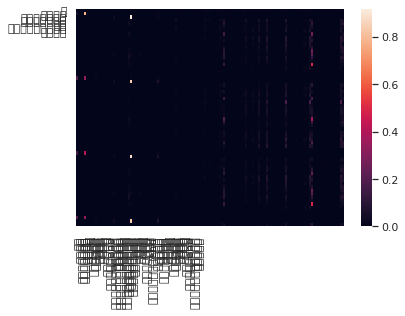

In [ ]:
for i in range(1) :
  k = np.random.randint(len(final_test_dataset))
  result,actual_sent,attention_heat_map = predict_sentences_with_heatmap(k)
  #print("sss  : ",actual_sent)
  #print(len(result))
  sum_words = []
  for s in actual_sent.split(' '):
    total_word+=1
    sum_words.append(s)
  sns.set()
  sns.heatmap(attention_heat_map,xticklabels=result,yticklabels =sum_words)